In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Partie 1 : Chargement et nettoyage

In [2]:
route_csv=pd.read_table('C:/Users/DIARRA née CISSE Bal/Downloads/CGDRSGDRDTRoutesdernierstravaux.csv',sep=';',decimal=',')

In [3]:
type(route_csv)

pandas.core.frame.DataFrame

In [4]:
route_csv.head()

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
0,000efbb3-e7c1-4b9c-a54e-1e0d6d81988a,76 D0131,20,0,7,7,0,490,3,200,490,3205,2715,1.5,2012,ES-BC,COUL
1,0011b2a4-5a64-4223-a856-6c9e8b6b2b48,76 D0293,20,0,7,7,6,724,6,940,6737,6953,216,1.0,2002,COUL,ES
2,0011d99f-9091-4be4-a16c-354f23b24004,76 D0003,20,0,7,7,51,708,51,810,50762,50864,102,1.0,1991,ES,AC
3,00155332-804f-4547-8537-0897d7e479e1,76 D0915,20,0,11,9,61,800,62,711,61177,62116,939,2.0,2000,BBUM,COUL
4,0016e2d9-78bb-4092-b846-90452703009a,76 D0022,20,0,7,7,86,26,86,650,86141,86765,624,1.0,2006,COUL,BB


In [5]:
route_csv.dtypes

entityid                     object
route                        object
rub                           int64
age                           int64
mois                          int64
annee                         int64
prd                           int64
abd                           int64
prf                           int64
abf                           int64
cumuld                        int64
cumulf                        int64
long                          int64
epaisseurdernierstravaux    float64
anneedernierstravaux          int64
naturedernierstravaux        object
supportdernierstravaux       object
dtype: object

In [6]:
#Le nettoyage deu dataframe
#Je considere qu'une valeur d'epaisseur derniers travaux est aberente quand elle est supérieur à 999.
new_route_csv=route_csv[route_csv['epaisseurdernierstravaux']<=999]
new_route_csv.head()

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
0,000efbb3-e7c1-4b9c-a54e-1e0d6d81988a,76 D0131,20,0,7,7,0,490,3,200,490,3205,2715,1.5,2012,ES-BC,COUL
1,0011b2a4-5a64-4223-a856-6c9e8b6b2b48,76 D0293,20,0,7,7,6,724,6,940,6737,6953,216,1.0,2002,COUL,ES
2,0011d99f-9091-4be4-a16c-354f23b24004,76 D0003,20,0,7,7,51,708,51,810,50762,50864,102,1.0,1991,ES,AC
3,00155332-804f-4547-8537-0897d7e479e1,76 D0915,20,0,11,9,61,800,62,711,61177,62116,939,2.0,2000,BBUM,COUL
4,0016e2d9-78bb-4092-b846-90452703009a,76 D0022,20,0,7,7,86,26,86,650,86141,86765,624,1.0,2006,COUL,BB


# Partie 2 : Analyse

In [7]:
route=new_route_csv.groupby('naturedernierstravaux').entityid.count()
#['entityid']
route

naturedernierstravaux
BB        1189
BB+BBM       2
BB-REP     178
BB-RPR       1
BBAUT        1
BBCOL        2
BBEDC        1
BBELA        7
BBELAS       2
BBM        179
BBME        24
BBMF         1
BBMM         4
BBMP        26
BBSG       316
BBSGM        3
BBSGP       19
BBSP       239
BBTM       340
BBTMM       13
BBTMP        4
BBUM       348
BETOFL       2
BETOFX       9
COUL       994
COUL-S       3
ECF          2
ECF-BC     140
ECF-MC     136
ES         864
ES-BC      198
ES-MC      131
ES-SP        2
ESDG         5
ESDGSP       5
ESLG         1
ESLGg       29
ESSP         6
I            1
PAVES        8
Name: entityid, dtype: int64

In [8]:
road=route.sort_values(ascending=False)
road.head(5)

naturedernierstravaux
BB      1189
COUL     994
ES       864
BBUM     348
BBTM     340
Name: entityid, dtype: int64

In [9]:
nb_travaux_par_annee=new_route_csv.groupby('anneedernierstravaux').entityid.count()


In [31]:
total_epaisseur_par_annee=new_route_csv.groupby('anneedernierstravaux').epaisseurdernierstravaux.sum()
total_epaisseur_par_annee

anneedernierstravaux
1900      24.0
1945      20.0
1950       0.0
1952      20.0
1974       6.0
1975      16.0
1977       4.0
1980       0.0
1981      52.0
1982      12.0
1983      40.0
1984      42.0
1985      30.0
1986      43.6
1987      58.0
1988      27.0
1989     111.0
1990     149.0
1991     102.0
1992     110.0
1993     144.7
1994     250.0
1995     230.5
1996     320.5
1997     400.7
1998     803.6
1999     744.6
2000     826.0
2001    1022.1
2002    1170.5
2003     573.5
2004     726.8
2005    1101.9
2006    1204.5
2007    1064.3
2008     669.6
2009     511.3
2010     257.4
2011     475.8
2012     503.1
2013     369.4
2014     539.3
Name: epaisseurdernierstravaux, dtype: float64

In [11]:
epaisseur_moyenne_par_annee=total_epaisseur_par_annee/nb_travaux_par_annee
epaisseur_moyenne_par_annee.sort_values(ascending=False)

anneedernierstravaux
1945    10.000000
1952    10.000000
1900     6.000000
1984     6.000000
1974     6.000000
1982     6.000000
1988     5.400000
1975     5.333333
1981     5.200000
1983     4.444444
1985     4.285714
1977     4.000000
1992     3.793103
1989     3.700000
1987     3.625000
1998     3.362343
1986     3.353846
1994     3.289474
1990     3.170213
1996     3.142157
1995     3.114865
1991     3.090909
1993     3.078723
2010     3.028235
2004     2.806178
2002     2.773697
1999     2.757778
2001     2.711141
2005     2.707371
2009     2.663021
2000     2.613924
2013     2.601408
2008     2.555725
1997     2.552229
2007     2.546172
2006     2.541139
2014     2.520093
2011     2.390955
2012     2.373113
2003     2.139925
1980     0.000000
1950     0.000000
dtype: float64

In [20]:
data=new_route_csv.groupby('naturedernierstravaux').count()
data.loc[:,'entityid'].size
##new_route_csv.
x= range(39)
x

range(0, 40)

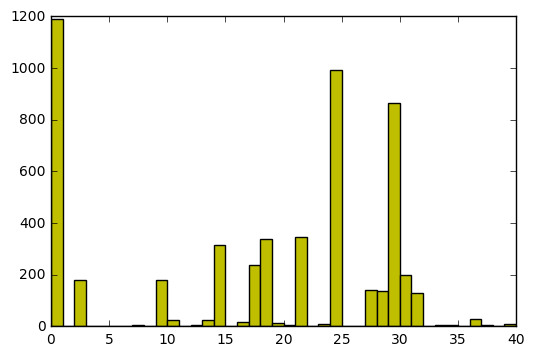

In [23]:
import matplotlib.pyplot as plt
x=range(40)
height= data.loc[:,'entityid']
width=1
plt.bar(x, height, width, color='y' )
plt.show()

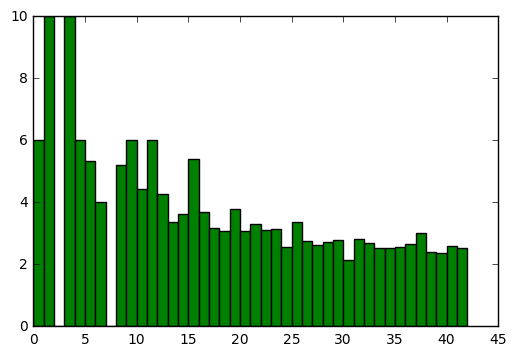

In [38]:
x=range(42)
height= epaisseur_moyenne_par_annee
width=1
plt.bar(x, height, width, color='g' )
plt.show()

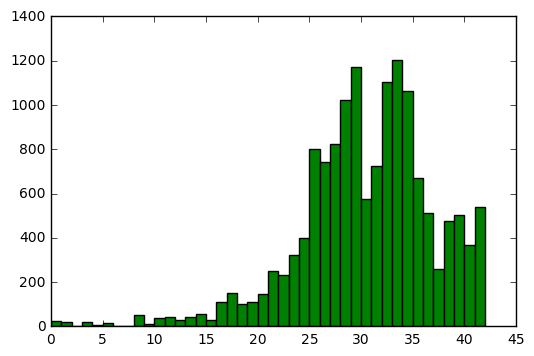

In [41]:
x=range(42)
height= total_epaisseur_par_annee
width=1
plt.bar(x, height, width, color='g' )
plt.show()